# 1. Exploratory Data Analysis

##  1. Chargement des données
Lire le fichier (CSV, Excel, SQL, etc.)

Aperçu général : .head(), .shape, .info(), .describe()

🔹 2. Compréhension du contexte métier
Quelle est la cible (target) ?

Que représente chaque variable ?

Quelle est la finalité (ex : prédire une maladie, un score, une vente) ?

🔹 3. Analyse des variables
a. Quantitatives (nombres) :
Moyenne, médiane, min/max, écart-type

Distribution (histogrammes, boxplots)

Détection des outliers

b. Qualitatives (catégorielles) :
Nombre de classes, fréquence

Bar charts / pie charts

🔹 4. Valeurs manquantes
Pourcentage de valeurs nulles

Répartition par variable

Visualisation avec missingno ou heatmaps

Plan de traitement : suppression, imputation, etc.

🔹 5. Corrélations entre variables
Matrice de corrélation (heatmap)

Vérifier multicolinéarité

Étude croisée entre variables : pairplot, groupby, etc.

🔹 6. Analyse de la variable cible (target)
Distribution (équilibre ou déséquilibre ?)

Taux de classes (pour classification)

Analyse bivariée : target vs features

Boxplots, Violinplots, t-tests, ANOVA

Tests statistiques pour les hypothèses (H0)

🔹 7. Détection des anomalies et valeurs aberrantes
Visualisation : Boxplots, Z-score, IQR

Impact potentiel sur la modélisation

🔹 8. Formulation d’hypothèses
Exemples :

"Les patients covid+ ont un taux de leucocytes plus élevé que les autres"

"L’âge est inversement lié à la présence de tel symptôme"

🔹 9. Préparation à la modélisation
Sélection des variables pertinentes

Idée de transformation : normalisation, standardisation, encodage

Réflexion sur un plan de modélisation

## Rapport 

### Analyse de Forme :

 **variable target** : Outcome
 
**lignes et colonnes** : 768, 9

**types de variables** : qualitatives : 22, quantitatives : 78

**Analyse des valeurs manquantes :**  aucune valeure null 
                

### Analyse de Fond :


**visualisation de la target:** 
       34% de positive 268/500
**Signification des variables :**
variable continues standardisées 
on remarque qil ya des variable qui on de valeure egale a zero  alor que ca ,e pourais pas exister comme dans le cas du bmi ou il ya 11 personne qui on un bmi == 0  
pas de variable qeulitatife dans le dataset 

**Relation Variables / Target :**
apre lanalyse et le t teste on obtien que : 
Pregnancies,Glucose,SkinThicknessf, Insulin, BMI,Age,DiabetesPedigreeFunction:✅ Différence significative → les diabétiques ont un nombre de grossesses différent des non-diabétiques. le taux de glucose est un facteur discriminant l’épaisseur de peau a une légère différence , l’insuline joue un rôle.les personnes diabétiques ont un IMC plus élevé ,l’hérédité est liée au diabète, Les diabétiques sont en moyenne plus âgés.

ce qui concerne la variable BloodPressure qui un une pvalue 0.0715	❌ Pas significatif → la pression artérielle n’est pas très différente entre les deux groupes.


# Analyse de Forme :

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
import pandas as pd 
df = pd.read_csv('../data/diabetes.csv')

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='proportion'>

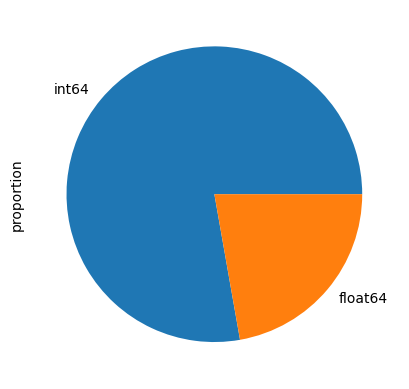

In [14]:
df.dtypes.value_counts('%').plot.pie()

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

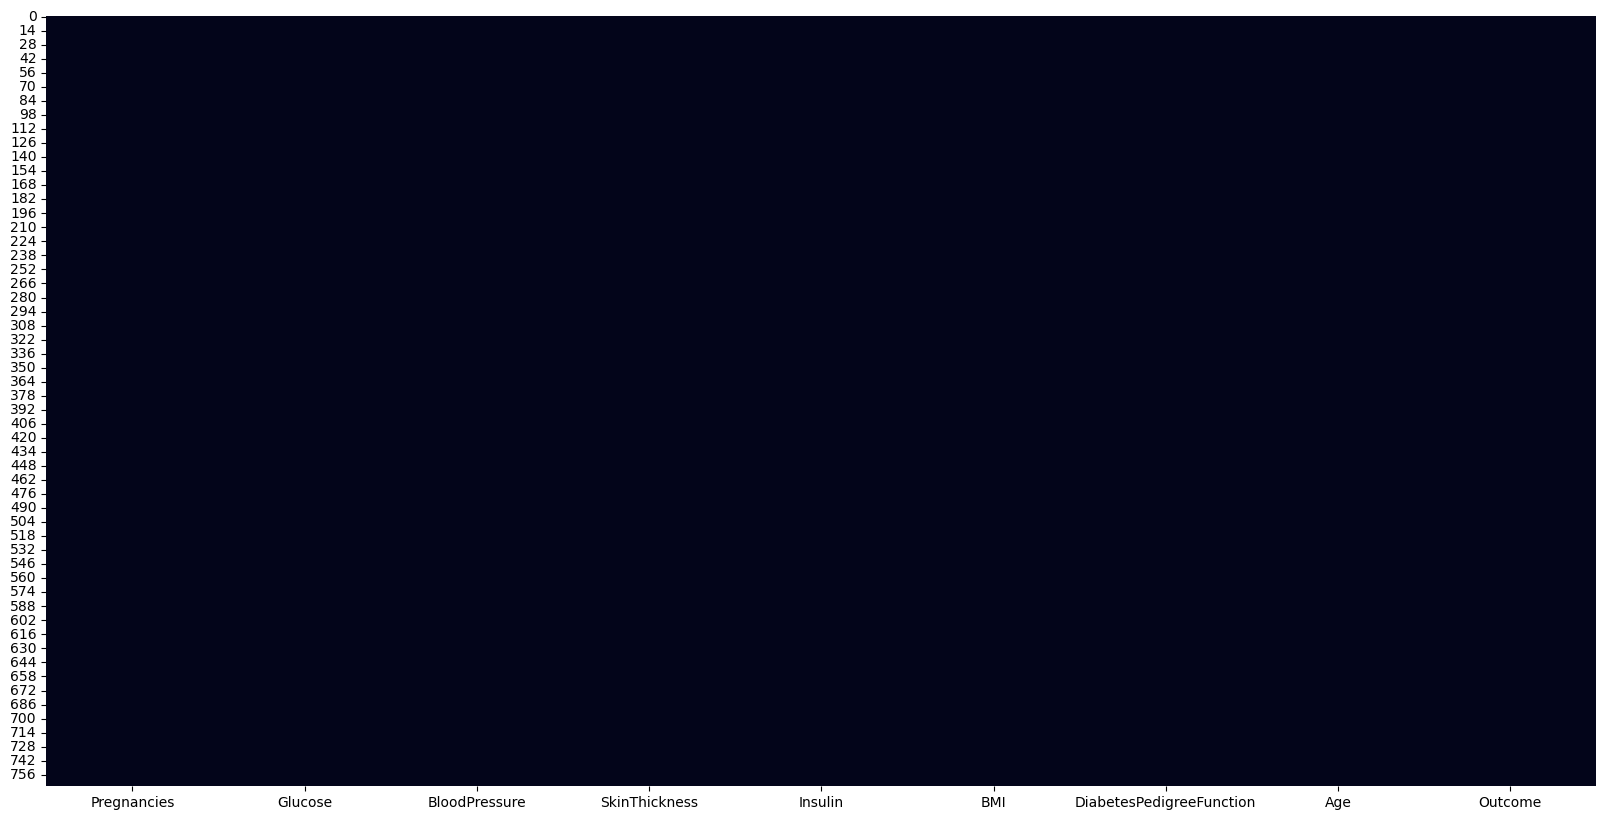

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

# Analayse de fond : 

In [18]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

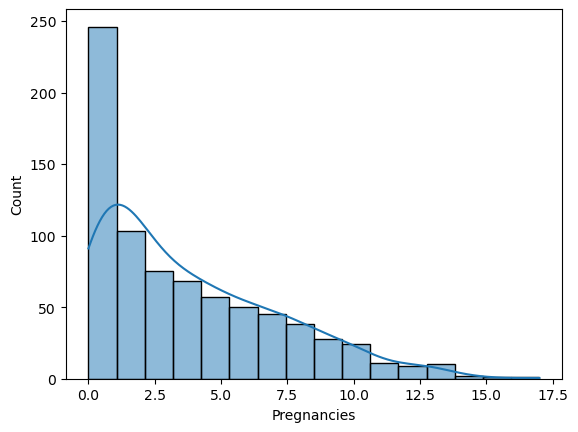

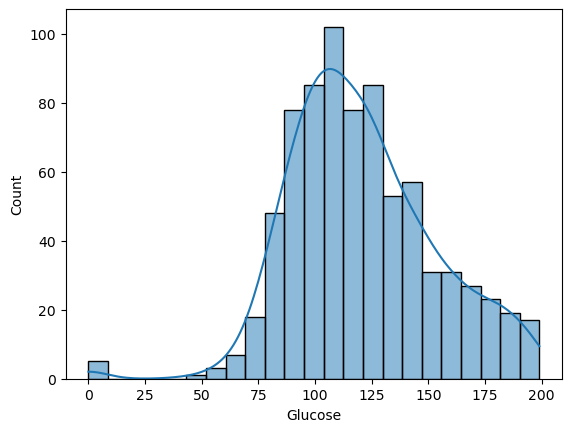

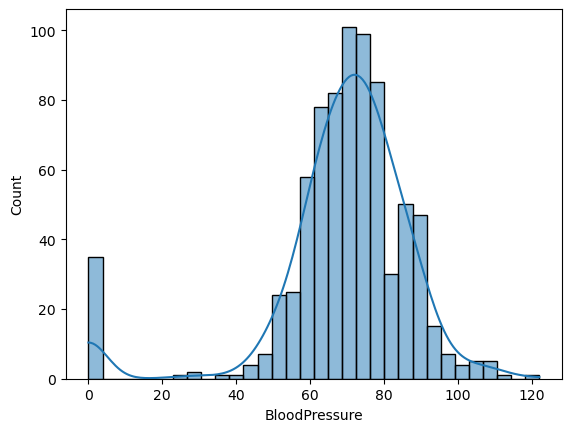

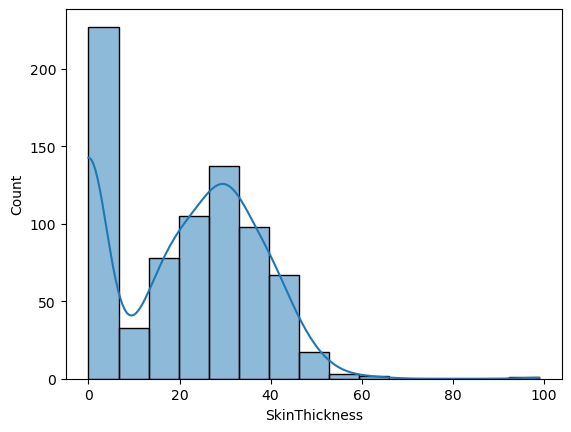

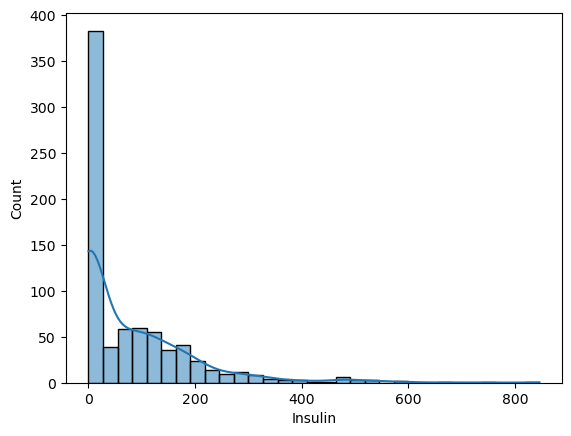

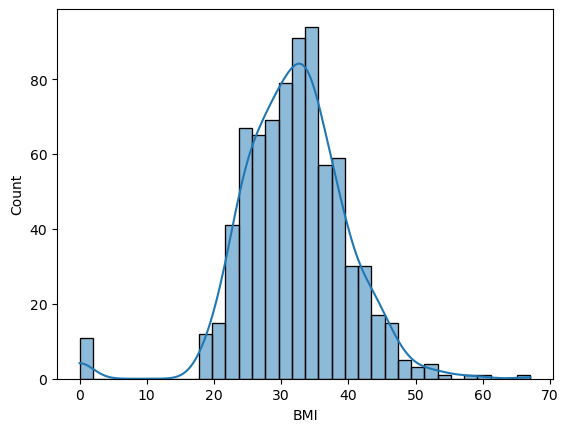

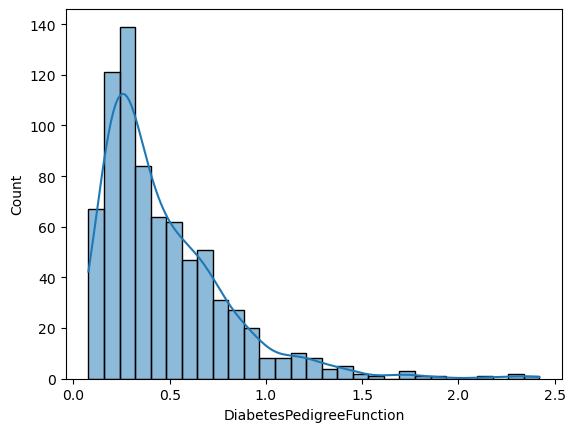

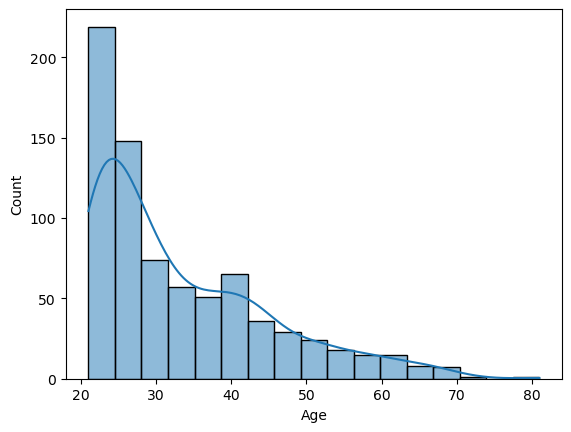

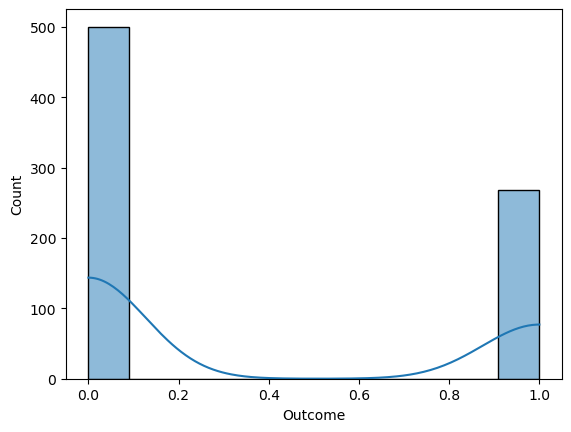

In [19]:
df_hist = df.copy()
num_cols = df_hist.select_dtypes(include='number').columns

for col in num_cols:
    df_hist[col] = df_hist[col].fillna(0)
    plt.figure()
    sns.histplot(df_hist[col], kde=True)


<Axes: xlabel='BMI', ylabel='Count'>

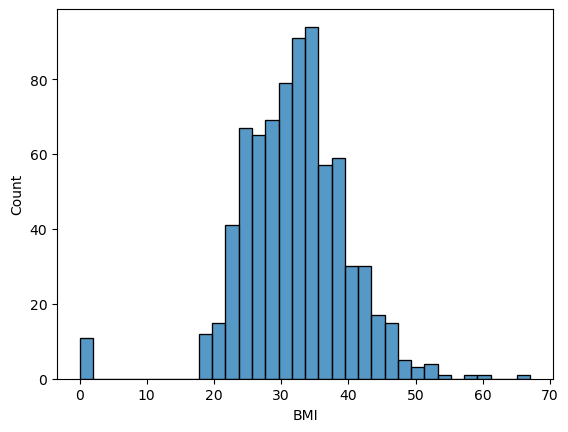

In [20]:
sns.histplot(df['BMI'])

In [21]:
df[df['BMI']==0]['BMI'].value_counts()

BMI
0.0    11
Name: count, dtype: int64

## Relation Target / Variables

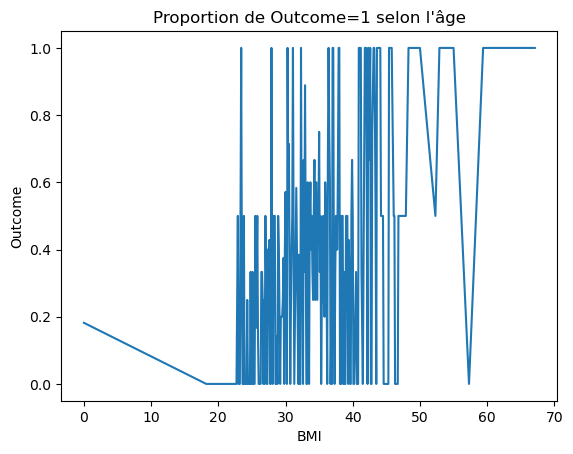

In [39]:

# Moyenne du outcome par âge
age_mean = df.groupby('Age')['Outcome'].mean().reset_index()

# Lineplot
sns.lineplot(x='Age', y='Outcome', data=age_mean)
plt.title("Proportion de Outcome=1 selon l'âge")
plt.show()


In [53]:
df.groupby('Outcome').describe()


Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

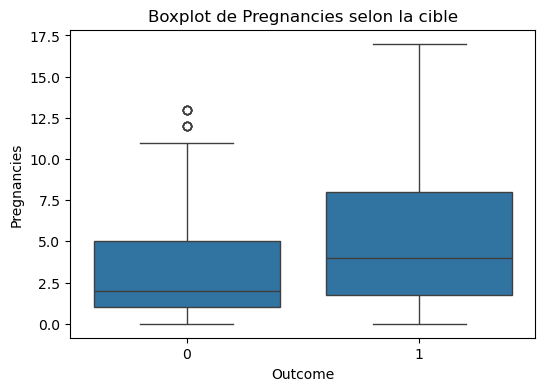

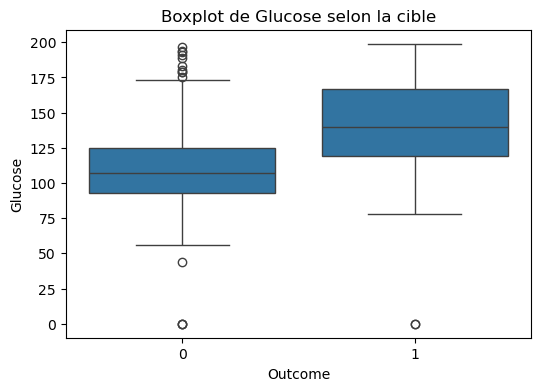

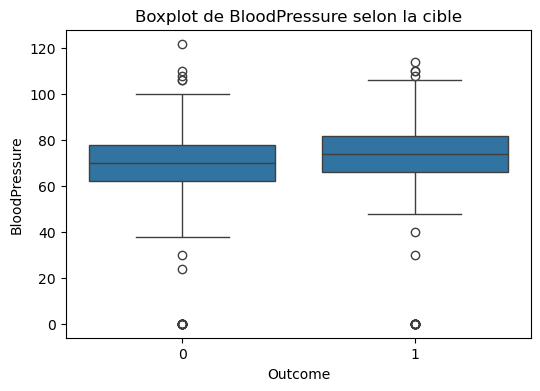

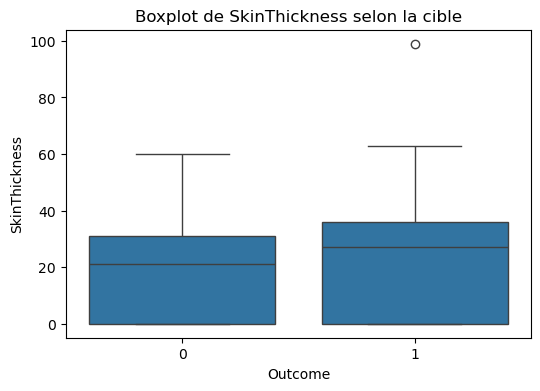

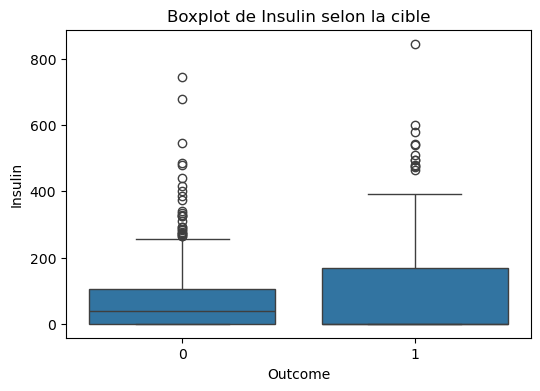

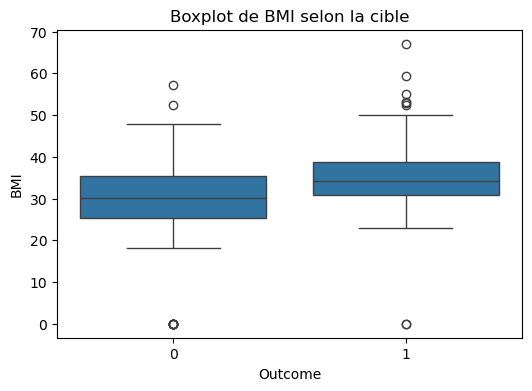

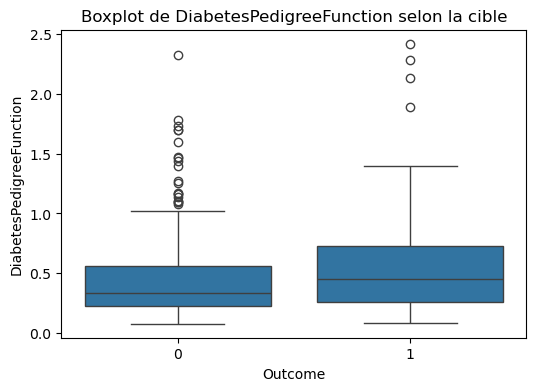

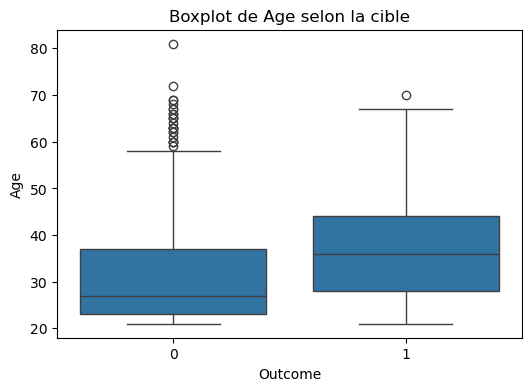

In [55]:
for col in df.drop(columns=['Outcome']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot de {col} selon la cible')
    plt.show()


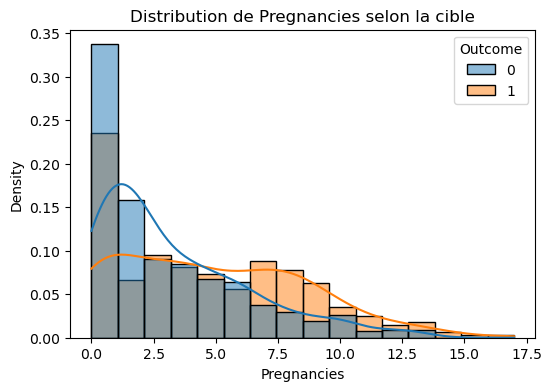

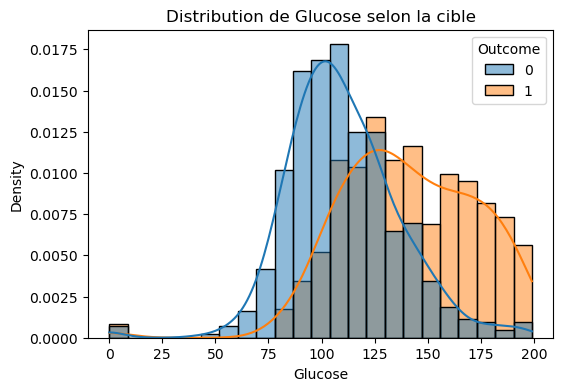

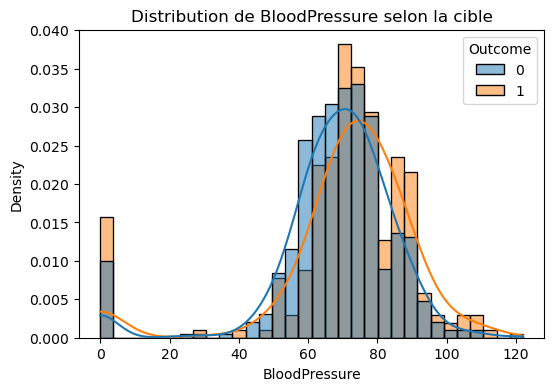

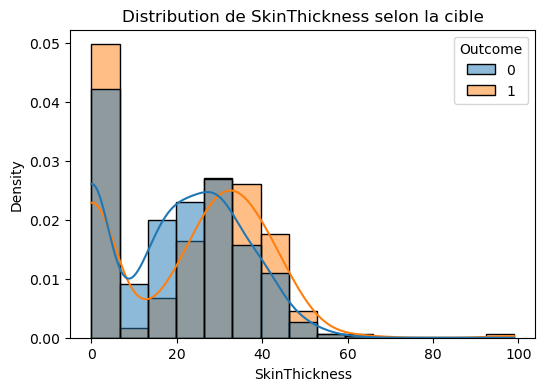

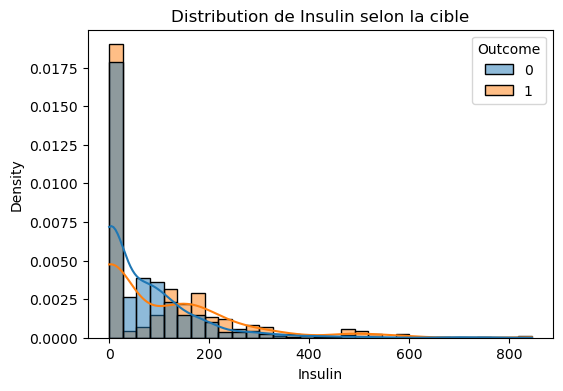

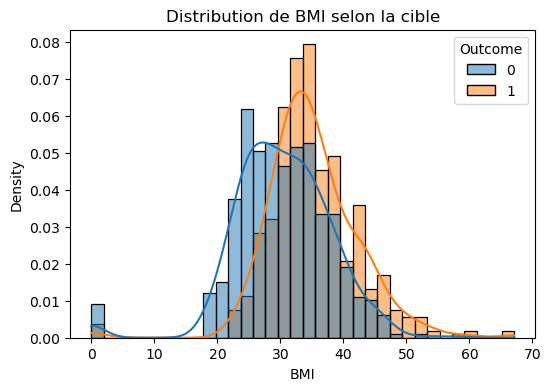

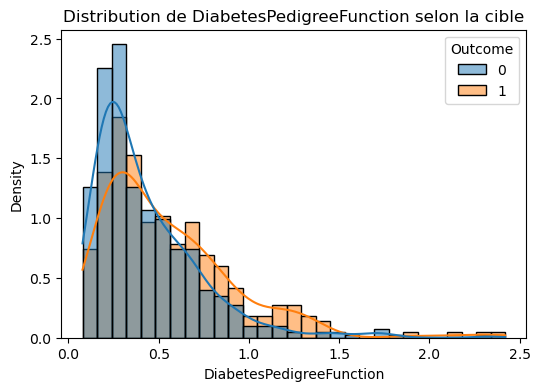

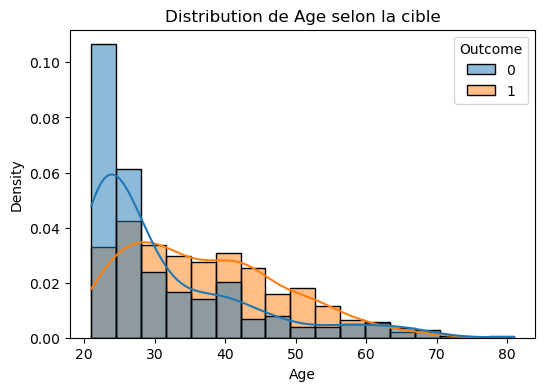

In [57]:
for col in df.drop(columns=['Outcome']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution de {col} selon la cible')
    plt.show()


In [61]:
from scipy.stats import ttest_ind

for col in df.drop(columns=['Outcome']).columns:
    group0 = df[df['Outcome'] == 0][col]
    group1 = df[df['Outcome'] == 1][col]
    stat, p = ttest_ind(group0, group1, nan_policy='omit')
    print(f'{col} : p-value = {p:.4f}')


Pregnancies : p-value = 0.0000
Glucose : p-value = 0.0000
BloodPressure : p-value = 0.0715
SkinThickness : p-value = 0.0383
Insulin : p-value = 0.0003
BMI : p-value = 0.0000
DiabetesPedigreeFunction : p-value = 0.0000
Age : p-value = 0.0000


<Axes: >

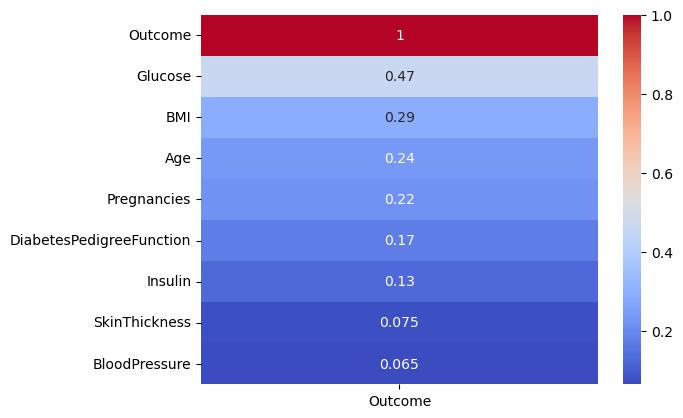

In [65]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Outcome']].sort_values(by='Outcome', ascending=False), annot=True, cmap='coolwarm')


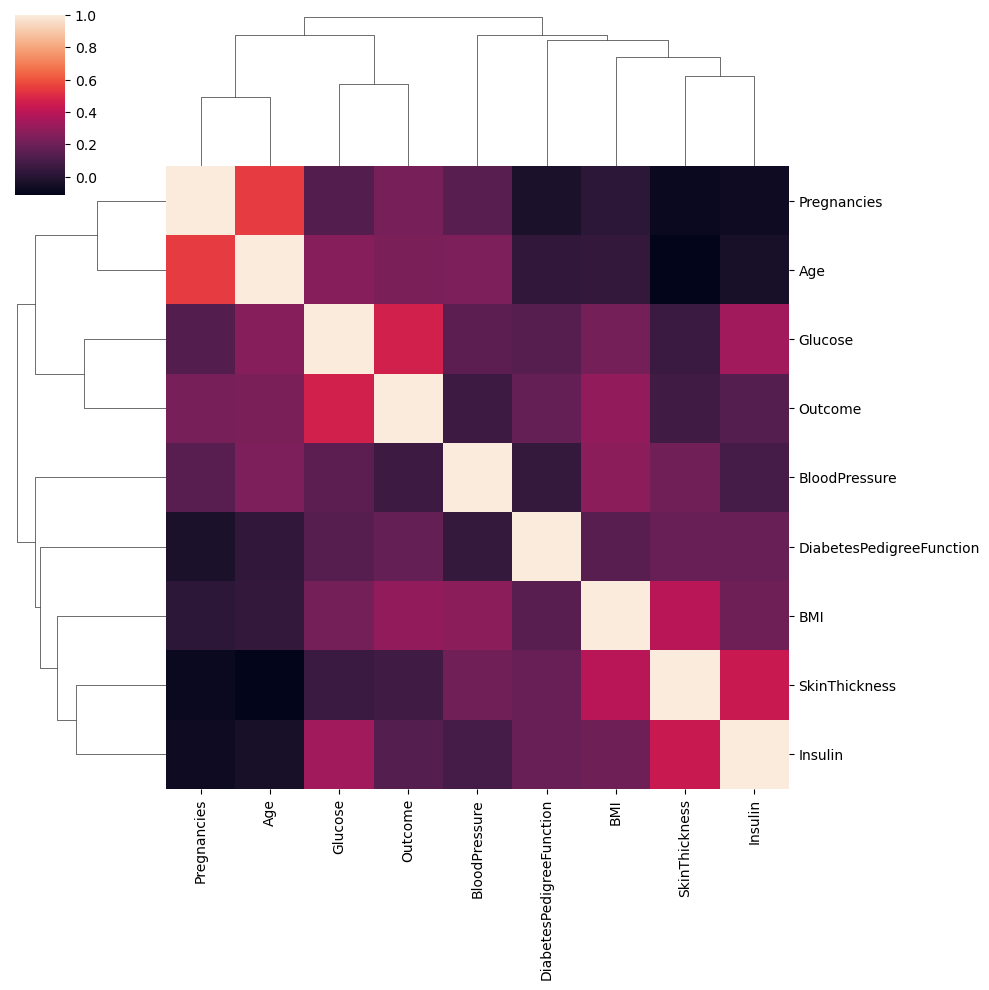

In [67]:
sns.clustermap(df.corr())